<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_09/hw_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

##Завантаження та підготовка даних

Перше, з чого нам потрібно почати – це завантажити датасет Fashion MNIST. Він доступний безпосередньо через Keras. Імпортуємо бібліотеки:

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Softmax
from keras import optimizers, losses
from sklearn.metrics import classification_report

Завантажимо датасет і подивимось на його вміст:

In [137]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Кожному зображенню відповідає одна мітка. Оскільки назви класів не включено до набору даних, збережіть їх тут, щоб використати пізніше при побудові зображень:

In [138]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Давайте подивимось на перший елемент датасету:

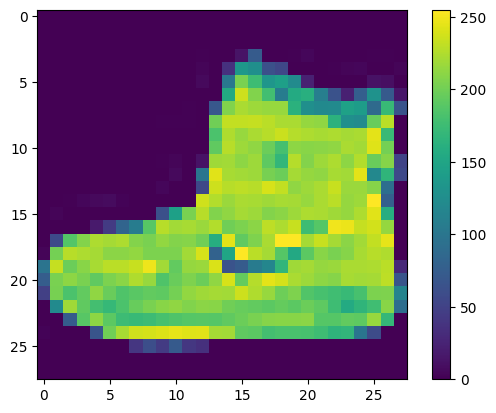

In [139]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Після завантаження нам потрібно нормалізувати дані. Це зробить процес навчання мережі більш ефективним. Тобто будуть дані в діапазоні від 0 до 1.

In [140]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Так як в нас датасет mnist, по ідеї він повинен мати зображення розміром 28 х 28. Давайте це перевіримо:

In [141]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Щоб переконатися, що дані в правильному форматі, і що ми готові до побудови та навчання мережі, покажемо перші 25 зображень з навчального набору і покажемо назву класу під кожним зображенням.

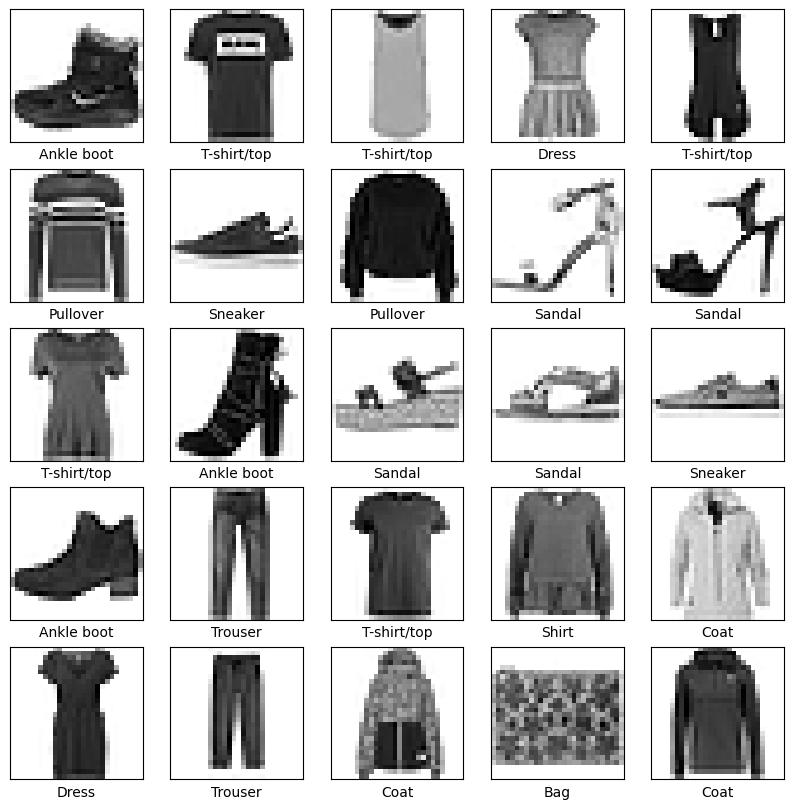

In [142]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

##Побудова моделі

Окей, супер. Зараз в нас вже є завантажений нормалізований датасет. Тепер ми вже можемо створити нашу модель. Ми почнемо з простої моделі і поступово будемо додавати шари(якщо це буде потрібно) та експериментувати з гіперпараметрами.

In [151]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [152]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Перед тренуванням моделі нам її потрібно скомпілювати. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.

In [153]:
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тепер ми можемо навчати модель, використовуючи тренувальні дані:

In [154]:
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 4s 7ms/step - loss: 0.6368 - accuracy: 0.7817 - val_loss: 0.4256 - val_accuracy: 0.8464
Epoch 2/10
480/480 [==============================] - 4s 9ms/step - loss: 0.4318 - accuracy: 0.8442 - val_loss: 0.3840 - val_accuracy: 0.8602
Epoch 3/10
480/480 [==============================] - 3s 7ms/step - loss: 0.3895 - accuracy: 0.8568 - val_loss: 0.3566 - val_accuracy: 0.8706
Epoch 4/10
480/480 [==============================] - 3s 7ms/step - loss: 0.3680 - accuracy: 0.8653 - val_loss: 0.3554 - val_accuracy: 0.8731
Epoch 5/10
480/480 [==============================] - 4s 9ms/step - loss: 0.3476 - accuracy: 0.8725 - val_loss: 0.3302 - val_accuracy: 0.8788
Epoch 6/10
480/480 [==============================] - 3s 7ms/step - loss: 0.3346 - accuracy: 0.8764 - val_loss: 0.3264 - val_accuracy: 0.8813
Epoch 7/10
480/480 [==============================] - 3s 7ms/step - loss: 0.3255 - accuracy: 0.8807 - val_loss: 0.3275 - val_accuracy: 0.8797
Epoch 

Давайте візуалізуємо отримані дані шляхом відображення отриманих результатів на графіках

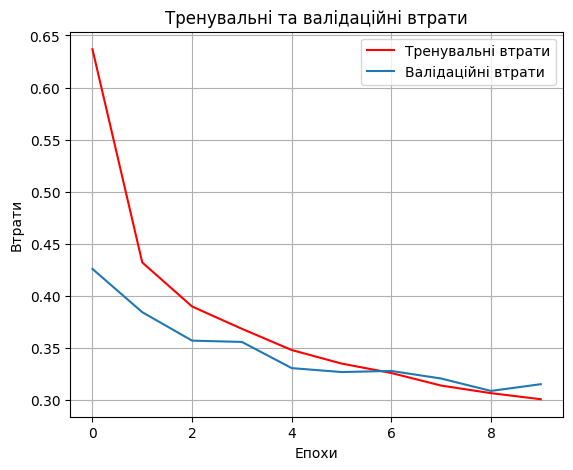

In [155]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

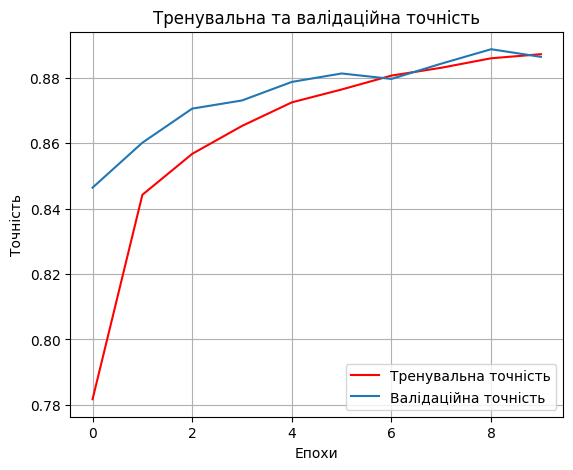

In [156]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Давайте подивимось на метрики якості по кожному класу:

In [174]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.78      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.77      0.86      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.72      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [158]:
class_weights = {
    0: 1.0,
    1: 1.0,
    2: 1.1,
    3: 1.0,
    4: 1.1,
    5: 1.0,
    6: 1.4,
    7: 1.0,
    8: 1.0,
    9: 1.0,
}

In [159]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.20,
    class_weight=class_weights
)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3258 - accuracy: 0.8904 - val_loss: 0.3081 - val_accuracy: 0.8867
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3166 - accuracy: 0.8948 - val_loss: 0.3102 - val_accuracy: 0.8859
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3135 - accuracy: 0.8944 - val_loss: 0.3057 - val_accuracy: 0.8880
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3075 - accuracy: 0.8966 - val_loss: 0.3000 - val_accuracy: 0.8899
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3035 - accuracy: 0.8985 - val_loss: 0.2961 - val_accuracy: 0.8922
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2979 - accuracy: 0.9005 - val_loss: 0.3053 - val_accuracy: 0.8877
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2944 - accuracy: 0.9021 - val_loss: 0.3069 - val_accuracy: 0.8903
Epoch 

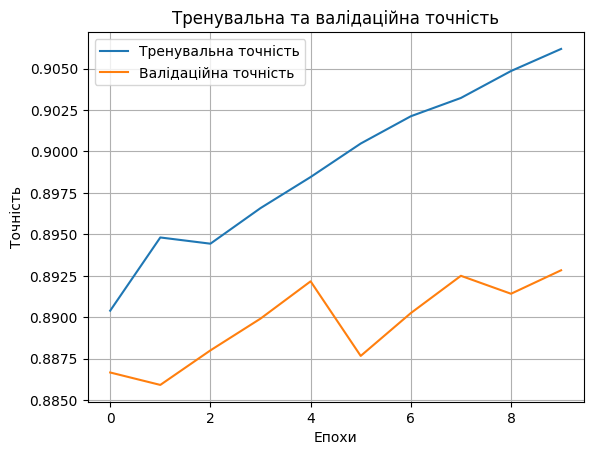

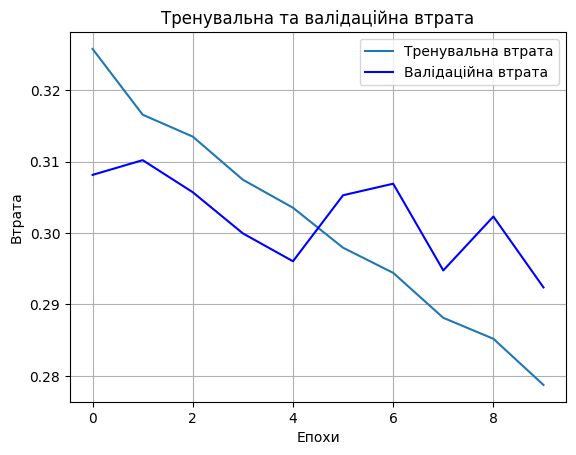

In [160]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# Графік точності
plt.plot(acc, label='Тренувальна точність')
plt.plot(val_acc, label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.figure()

# Графік втрати
plt.plot(loss, label='Тренувальна втрата')
plt.plot(val_loss, 'b', label='Валідаційна втрата')
plt.title('Тренувальна та валідаційна втрата')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.grid(True)
plt.legend()

plt.show()

Прогноз:

In [176]:
probability_model = Sequential([model, Softmax()])

In [177]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [179]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

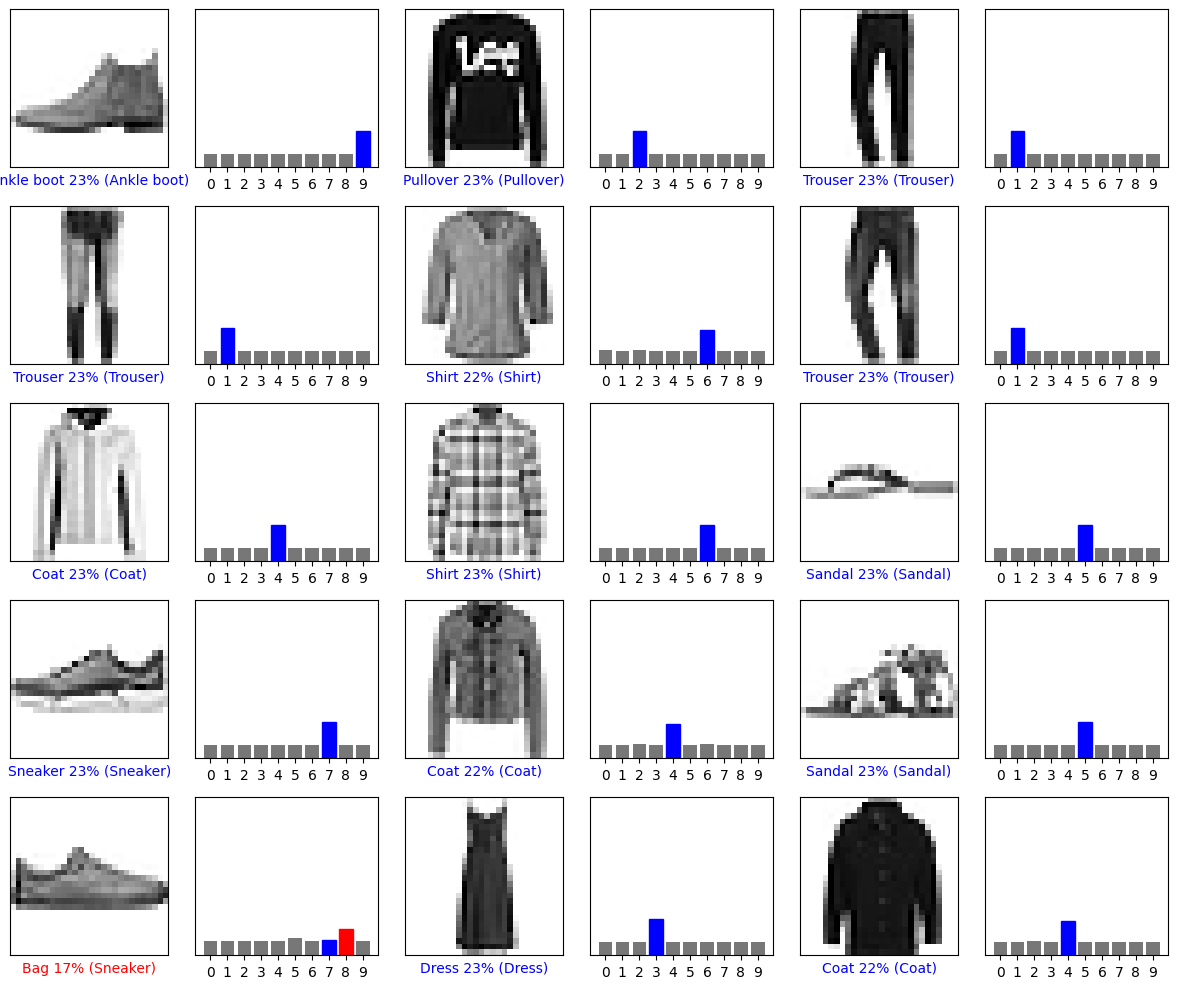

In [181]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()